In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

t = symbols( 't', real=True, positive=True )
n, d, k = symbols( 'n d k', positive=True, integer=True )
init_printing(use_unicode=True)

# Define the vector which is not parallel to any edge vector, which will tend to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

def P12(n,d):
    return Vector.zero

def P23(n,d):
    return n*N.i

def P13(n,d):
    return n*N.j

def Q12_1(n,d):
    return -d*N.j

def Q12_2(n,d):
    return -d*N.i

def Q23_2(n,d):
    return (n+d)*N.i

def Q23_3(n,d):
    return (n+d)*N.i - d*N.j

def Q13_1(n,d):
    return (n+d)*N.j

def Q13_3(n,d):
    return -d*N.i + (n+d)*N.j

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:

def Delta1(n,d):
    return f(P23(n,d), -v1, -v1 + v2 ) * ( f(0*v1 + 0*v2, v1, v1 - v2) + f(d*v1, -v1, -v2) + f(d*v1 - d*v2, v2, -v1 + v2) )

def Delta2(n,d):
    return f(P13(n,d), v1 - v2, -v2 ) * ( f(0*v1 + 0*v2, v2, -v1 + v2) + f(d*v2, -v1, -v2) + f(-d*v1 + d*v2, v1, v1 - v2) )

def Delta3(n,d):
    return f(P12(n,d), v1 , v2 ) * ( f(0*v1 + 0*v2, -v1, -v2) + f(-d*v1, v1, v1 - v2) + f(-d*v2, v2, -v1 + v2) )


def Sum(n,d):
    return Delta1(n,d) + Delta2(n,d) + Delta3(n,d)

# Take the limit as t -> 0 to get the Euler characteristic(?)

def EulerCalculation(n,d):
    return limit(Sum(n,d),t,0)


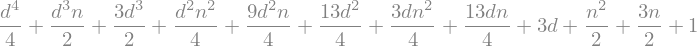

In [2]:
EulerCalculation(n,d) # Letting t -> 0  to obtain the Euler characteristic (n.b. degree-0 term in a is equal to lattice point count for CP2's polytope)

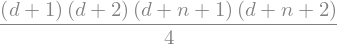

In [3]:
factor(EulerCalculation(n,d))

In [4]:
def Euler(n,d):
    return simplify( Rational(1,4) * ( (d+1)*(d+2)*(n+d+1)*(n+d+2) ) )

In [5]:
def Diff(n,d):
    return factor(Euler(n,d) - Euler(n,d-1))

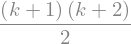

In [6]:
Euler(k,0) # The usual formula for the number of lattice points in the dilated 2-simplex

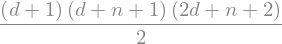

In [7]:
Diff(n,d)

Formula for $\dim H^{0}(M_{\nu}^{\leq d}; \mathcal{L}_{\nu}^{\leq d})$ with $M_{\nu} = T^{\ast}\mathbb{CP}^{2}$ is:

$ \dim H^{0}(M_{n}^{\leq d}; \mathcal{L}_{n}^{\leq d}) = \frac{(n + d + 1)(n + d + 2)(d + 1)(d+2)}{4}.$ 

$ \dim H_{d}^{0}(M_{n}; \mathcal{L}_{n}) = \frac{(n + d + 1)(d+1)(n + 2d + 2)}{2}.$

In [8]:
def topDelta12(n,d):
    return f( Q12_1(n,d), v1, -v1 + v2 ) + f( Q12_2(n,d), v1 - v2, v2 )

def topDelta23(n,d):
    return f( Q23_2(n,d), -v1 + v2, -v2 ) + f( Q23_3(n,d), v2, -v1 )

def topDelta13(n,d):
    return f( Q13_1(n,d), v1 - v2, -v1 ) + f( Q13_3(n,d), v1, -v2 )

def Volume(n,d):
    return factor( limit(topDelta12(n,d) + topDelta23(n,d) + topDelta13(n,d), t, 0) )

def Fact(n,d,k):
    return simplify( ( factorial(n+d+k) / factorial(n+d) ) / factorial(k) )

def Dimension(n,d,k):
    return simplify( ( Fact(n,d,k) * Fact(0,d,k) ) - ( Fact(n,d-1,k) * Fact(0,d-1,k) ) )

In [9]:
Dimension(n,d,0)

In [10]:
Dimension(n,d,1)

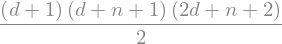

In [31]:
Dimension(n,d,2)

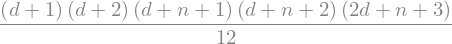

In [32]:
Dimension(n,d,3)

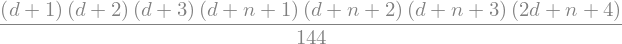

In [34]:
simplify( Dimension(n,d,4) )

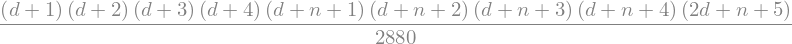

In [65]:
simplify( Dimension(n,d,5) )

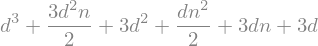

In [21]:
expand( Dimension(n,d,2) - Dimension(n,0,2) )

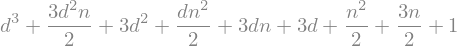

In [16]:
expand( Dimension(n,d,2) )

In [26]:
simplify( Dimension(n,d,1) )

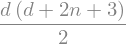

In [29]:
factor( Dimension(n+d,0,2) - Dimension(n,0,2) )

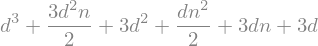

In [40]:
expand( Dimension(n,d,2) - Dimension(n,0,2) )

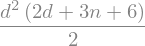

In [33]:
factor ( d**3 + Rational(3,2)*(d**2)*n + 3*d**2 )

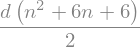

In [37]:
d*(n**2 + 6*n + 6)/2
